# Deutsch Algorithm

$\braket{x | U_f | x}$  
$\braket{y \oplus f(x) | U_f | y}$  

If  

$$
\ket{y} = 0
$$

then  

$$
U_f \ket{x}\ket{0} = \ket{x} \ket{0 \oplus f(x)} \\
U_f \ket{x}\ket{0} = \ket{x} \ket{f(x)}
$$

Because  

$$
0 \oplus 0 = 0 \\
0 \oplus 1 = 1
$$

and $\oplus$ denotes XOR.  

Therefore,  

$$
y \oplus f(x) =
\begin{cases}
f(x), & y = 0 \\
\overline{f(x)}, & y = 1
\end{cases}
$$

Example: 

$$
U_f \ket{x} \ket{-} = U_f \left[ \tfrac{1}{\sqrt{2}} (\ket{x} \ket{0} - \ket{x} \ket{1}) \right] \\
U_f \ket{x} \ket{-} = \tfrac{1}{\sqrt{2}} \left( U_f \ket{x} \ket{0} - U_f \ket{x} \ket{1} \right) \\
U_f \ket{x} \ket{-} = \tfrac{1}{\sqrt{2}} \left( \ket{x} \ket{f(x)} - \ket{x} \ket{\overline{f(x)}} \right)
$$

Thus,

$$
U_f \ket{x} \ket{-} =
\begin{cases}
\ket{x} \ket{-}, & f(x) = 0 \\
-\,\ket{x} \ket{-}, & f(x) = 1
\end{cases}
$$

**Phase Oracle:**
$$
U_f \ket{x} \ket{-} = (-1)^{f(x)} \ket{x} \ket{-}
$$

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

## Constant Oracles $f(x)$
### Constant 0

$
f(x) =
\begin{cases}
0, & x = 0 \\
0, & x = 1
\end{cases}
$

### Constant 1

$
f(x) =
\begin{cases}
1, & x = 0 \\
1, & x = 1
\end{cases}
$

In [3]:
def const_0():
    qc = QuantumCircuit(2)
    return qc

def const_1():
    qc = QuantumCircuit(2)
    # flipped q1 to 1 which stays the same
    qc.x(1)
    return qc

## Balanced Oracles $f(x)$
### Identity 

$
f(x) =
\begin{cases}
0, & x = 0 \\
1, & x = 1
\end{cases}
$

### Not

$
f(x) =
\begin{cases}
1, & x = 0 \\
0, & x = 1
\end{cases}
$

In [4]:
def identity():
    qc = QuantumCircuit(2)
    qc.cx(0, 1)
    return qc

def balanced_not():
    qc = QuantumCircuit(2)
    # entangle and then flip q1
    qc.cx(0, 1)
    qc.x(1)
    return qc

In [20]:
# Main Deutsch algorithm
def deutsch_algorithm(oracle):
    # Create circuit with 2 qubits and 1 classical bit
    qc = QuantumCircuit(2, 2)
    
    # Step 1: Initialize qubit 1 to |1⟩
    qc.x(1)
    
    # Step 2: Apply Hadamard gates to both qubits
    qc.h([0, 1])
    
    qc.barrier()
    
    # Step 3: Apply the oracle
    qc = qc.compose(oracle)
    
    qc.barrier()
    
    # Step 4: Apply Hadamard to qubit 0
    qc.h(0)
    
    # Step 5: Measure qubit 0
    qc.measure(0, 0)
    
    return qc



In [21]:
# Test all oracles
oracles = {
    'constant_0': const_0(),
    'constant_1': const_1(),
    'balanced_identity': identity(),
    'balanced_not': balanced_not()
}

simulator = AerSimulator()
for name, oracle in oracles.items():
    # Create and run circuit
    circuit = deutsch_algorithm(oracle)
    # Transpile and simulate
    transpiled = transpile(circuit, simulator)
    result = simulator.run(transpiled, shots=1000).result()
    counts = result.get_counts()
    
    print(f"{name}: {counts}")
    
    # Draw one example circuit
    if name == 'balanced_identity':
        circuit.draw('mpl')

constant_0: {'00': 1000}
constant_1: {'00': 1000}
balanced_identity: {'01': 1000}
balanced_not: {'01': 1000}


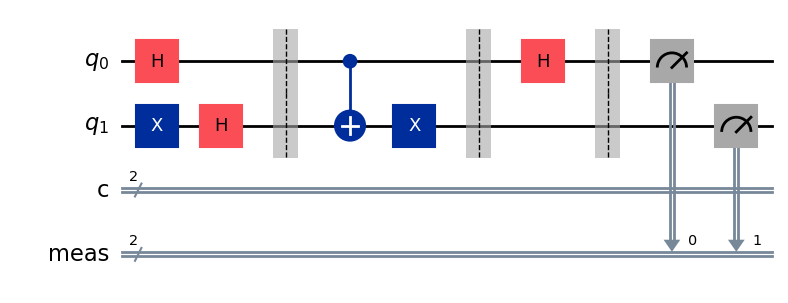

In [19]:
circuit = deutsch_algorithm(oracles["balanced_not"])
circuit.draw('mpl')
